# Empirical Orthogonal Function Analysis

EOF analysis provides a simple and efficient means of evaluating the dominant modes of variability contained in a dataset. It is done by moving to a new mathematical basis which relates to the covariance of the data, and then focusing the analysis effort on the basis vectors that describe the majority of the variance. It is <u>Principal Component Analysis</u> applied to spatio-temporal data.

This code calculates both spatial and temporal eigenvectors (also known as eigenfunctions or EOFs) that describe the variance of a spatio-temporal dataset (e.g. shoreline position data along  a beach). 

The aim is to describe the datasets variability across both space and time with new basis functions. These are purely mathematic functions (eigenfunctions) but can sometimes relate closely to physical processes. Also, there is some research suggesting a relationship between alongshore and cross-shore transport processes and the shape of the eigenfunctions;
- extrema in the spatial eigenfunctions relates to areas of maximum variability,
- nodal points in the spatial eigenfunctions relates to areas of stability (low variability),
- multiple nodal points in the spatial eigenfunction may indicate the importance of longshore processes,
- spatial eigenfunctions without nodes can describe shoreline response to cross-shore processes (i.e. the entire coast advances/retreats in phase).

A full positive/negative spatial eigenfunction implies that if erosion (or accretion) is occurring at one location, erosion (or accretion) is also occurring at every other location. Gradients in this eigenfunction can imply a different rate of erosion/accretion.

See per Miller & Dean (2006, 2007): Shoreline variability via EOF analysis - https://doi.org/10.1016/j.coastaleng.2006.08.013.
This method has been used since by Harley et al. (2011) - https://doi.org/10.1029/2011JF001989 - to show that cross-shore processes are an important mode of variability in beach rotation.

Other useful references (EOFs or Principal Component Analysis):
- http://stockage.univ-brest.fr/~herbette/Data-Analysis/data_analysis_eof.pdf
- https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643
- https://www.cygres.com/OcnPageE/Glosry/OcnEof1E.html

## 1 - Import Python Modules

In [1]:
# import packages and modules
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## 2 - User Inputs

In [123]:
# User inputs
resampleInterval = '1MS' # see Pandas documentation for frequency choices for resampling (e.g. monthly - '1MS')
transectSpacing = 50 # metres
directory = 'C:/Users/s5245653/OneDrive - Griffith University/Projects/GrassyWaves/CoastSat/data/Grassy_1980-01-01_2022-07-08'
filename = 'transect_time_series_tidally_corrected_for_test.csv'
idxCol = 'dates' # index column in csv data (needs to be datetime)
minVarianceOfInterest = 5 # percent
firstDate = datetime.datetime(1987, 1, 1, tzinfo=datetime.timezone.utc) # year, month, day
lastDate = datetime.datetime(2020, 12, 31, tzinfo=datetime.timezone.utc)

## 3 - Load and Clean Data

In [138]:
# Load Data and "Clean"
os.chdir(directory)
df = pd.read_csv(filename, index_col = idxCol)
df.index = pd.to_datetime(df.index)
# De-mean the data to focus on variance
df = df - df.mean()
# Specific to my dataset to flip the column order
df = df.iloc[:, ::-1]

# Create a dataset clean enough for analysis (remove nan values etc.)
df2 = df.copy(deep = True)
df2 = df2.truncate(before = firstDate)
#df2 = df2.resample(resampleInterval).mean()
df2 = df2.dropna()

In [139]:
# Visualise dataset briefly
df2

,Transect 25,Transect 24,Transect 23,Transect 22,Transect 21,Transect 20,Transect 19,Transect 18,Transect 17,Transect 16,...,Transect 10,Transect 9,Transect 8,Transect 7,Transect 6,Transect 5,Transect 4,Transect 3,Transect 2,Transect 1_WEC
dates,,,,,,,,,,,,,,,,,,,,,
1987-09-16 23:31:08+00:00,5.253882,7.931361,12.273142,7.948819,2.231058,1.414856,1.332735,-1.658992,-6.119779,-5.757869,...,1.170494,3.038605,4.757680,1.748364,1.755692,4.215056,-1.980650,-9.149160,-14.013212,-8.367037
1987-09-23 23:37:29+00:00,6.350753,15.858518,26.041846,21.038536,25.669216,21.888932,17.717247,14.489044,17.298117,17.647562,...,14.388682,24.901901,24.830337,24.830573,27.094899,22.159376,25.182802,21.802707,16.476418,10.646782
1987-10-25 23:38:03+00:00,-5.242614,-1.340951,1.692575,7.309982,10.912333,13.102863,8.659520,9.365070,8.406105,5.201807,...,5.135662,10.797640,14.658245,6.257922,1.462882,4.163249,6.390033,2.034415,7.608646,5.443902
1988-04-11 23:34:20+00:00,-1.668858,-1.501453,-0.754175,3.430403,3.603466,5.219863,8.953242,7.280312,6.041097,6.718995,...,7.801297,9.236177,7.256477,10.170834,4.255632,1.187795,4.074857,6.950386,5.189212,-1.129976
1988-06-21 23:41:02+00:00,14.409219,15.104340,31.203920,31.810358,29.091030,29.094485,24.533714,23.770938,25.518336,21.712806,...,8.356501,14.989306,20.044144,12.001232,11.613460,6.374936,8.453489,13.123746,12.100289,8.283052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08 00:18:13+00:00,-12.635438,-9.866788,-5.783729,-10.070324,-5.321630,-1.555683,-2.070024,-0.120715,2.047392,-1.197744,...,3.888096,4.608410,4.994911,3.284063,3.560690,0.427847,-0.608366,-1.511734,-5.521939,2.192381
2020-11-23 00:18:09+00:00,-13.839317,-13.068728,-14.775338,-12.921205,-8.357336,-7.365624,-4.560078,-1.718632,-2.663812,-0.624011,...,-15.489341,-8.525614,-3.460353,-6.075262,-5.245367,-8.107326,-9.477458,-8.763264,-7.418672,-7.961673
2020-11-26 00:28:05+00:00,-18.931263,-13.683366,-10.445151,-9.560468,-7.649596,-4.809769,-3.403901,-0.611525,0.750868,2.656559,...,6.508400,2.184366,4.974247,1.356100,2.665466,-0.511796,3.949983,-1.328592,-1.122200,-4.409756


## 4 - Compute Eigenfunctions

In [140]:
# Create matrix of the data
y = df2.to_numpy()
y_t = y.transpose()

# Create a spatial covariance-like matrix
temp = 1 / y.size
a = temp * np.matmul(y_t, y) # a measure of the spatial covariance
b = temp * np.matmul(y, y_t) # a measure of the temporal covariance

In [141]:
# Compute eigenvalues and eigenvectors from matrices
eigenValues, eigenVectors = np.linalg.eig(a)
eigenValuesB, c = np.linalg.eig(b)

# Returns eigenValues in order from largest to smallest, with eigenVectors returned as corresponding columns
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
e_x = eigenVectors[:,idx]

idx = eigenValuesB.argsort()[::-1]
eigenValuesB = eigenValuesB[idx] # first nx eigenvaluesB should equal eigenvalues from A
c_t = c[:,idx]

# Calculate percent of variance represented by the eigenfunctions
pOfVar = np.divide(100 * np.real(eigenValues), np.sum(np.real(eigenValues)))
k = sum(map(lambda x : x > minVarianceOfInterest, pOfVar)) # number of eigenfunctions (vectors) to plot
# Ensure at least 2 eigenfunctions are plotted
if k == 1:
    k = 2
    
# Weights
w = [np.sqrt(eigenValues[i]*y.size) for i in range(k)]

# Check eigenvalues match:
np.round(np.real(eigenValuesB[0:min(y.shape)]), 4) == np.round(eigenValues, 4)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [142]:
for i in range(k):
    print(f'EOF{i+1}: {np.round(pOfVar[i], 2)}%')
    
print(f'Therefore, the first {k} EOFs describe {np.round(np.sum(pOfVar[0:k]),1)} of the total variance!')

EOF1: 61.32%
EOF2: 19.98%
EOF3: 5.43%
Therefore, the first 3 EOFs describe 86.7 of the total variance!


## 5 - Plot Results

[]

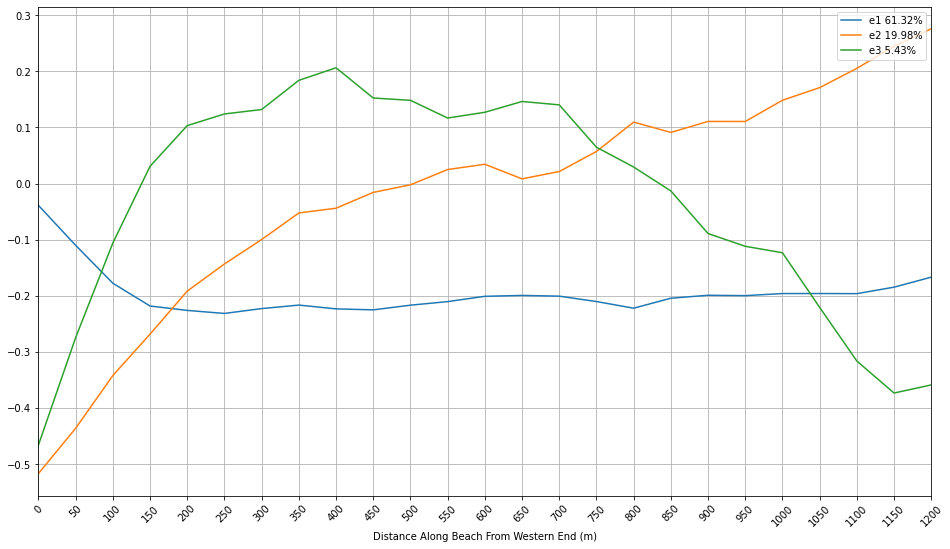

In [143]:
# Plot Spatial variability

# Plot Variables
numTransects = len(e_x)
xtickLabels = np.arange(0, transectSpacing * numTransects, transectSpacing)
xticks = np.arange(0, numTransects)

# Plotting
fig, ax = plt.subplots(figsize = (16,9))

for i in range(k):
    ax.plot(np.real(e_x[:,i]), label = f'e{i+1} {np.round(pOfVar[i], 2)}%')
ax.legend(loc = 'upper right')
ax.grid()
plt.xticks(xticks, labels = xtickLabels, rotation = 45)
plt.xlabel('Distance Along Beach From Western End (m)')
plt.xlim(xticks[0], xticks[-1])

plt.plot()

[]

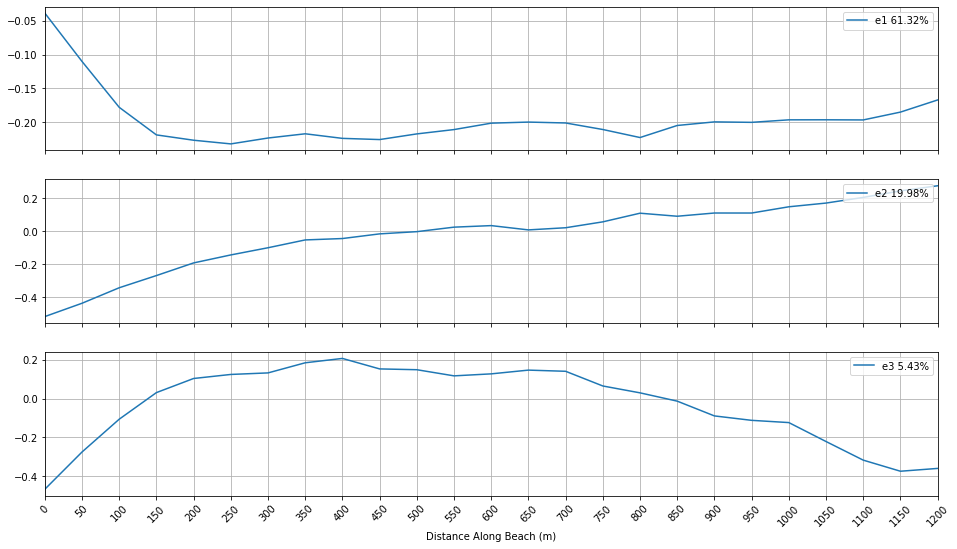

In [144]:
# Plot Spatial variability - Individual Plots

# Plot Variables
numTransects = len(e_x)
xtickLabels = np.arange(0, transectSpacing * numTransects, transectSpacing)
xticks = np.arange(0, numTransects)

# Plotting
fig, ax = plt.subplots(k, 1, sharex = True, figsize = (16,9))

for i in range(k):
    ax[i].plot(np.real(e_x[:,i]), label = f'e{i+1} {np.round(pOfVar[i], 2)}%')
    ax[i].legend(loc = 'upper right')
    ax[i].grid()
plt.xticks(xticks, labels = xtickLabels, rotation = 45)
plt.xlabel('Distance Along Beach (m)')
plt.xlim(xticks[0], xticks[-1])

plt.plot()

[]

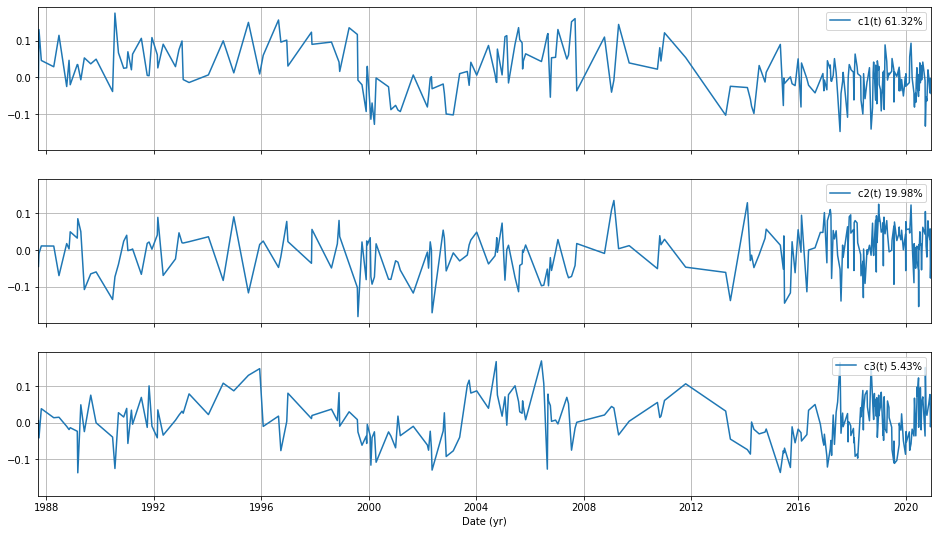

In [145]:
# Plot Temporal variability

# Plot Variables
numTimes = len(c_t)

# Plotting
fig, ax = plt.subplots(k, 1, sharex = True, sharey ='col', figsize = (16,9))

for i in range(k):
    ax[i].plot(df2.index, np.real(c_t[:,i]), label = f'c{i+1}(t) {np.round(pOfVar[i], 2)}%')
    #ax[i].plot(0.05*SAMI, label = 'SAMI')
    #ax[i].plot(0.05*SOI, label = 'SOI')
    ax[i].legend(loc = 'upper right')
    ax[i].grid()
plt.xlabel('Date (yr)')
plt.xlim(df2.index[0], df2.index[-1])

plt.plot()

In [146]:
len(np.real(c_t[0]))

265

# The End

## Further Analysis with SAM

In [225]:
SAMloc = 'C:/Users/s5245653/OneDrive - Griffith University/Projects/GrassyWaves/Data/SAMIndex.csv'
SOIloc = 'C:/Users/s5245653/OneDrive - Griffith University/Projects/GrassyWaves/Data/SOI_monthly.txt'


SAMI = pd.read_csv(SAMloc, index_col = 'Unnamed: 0', parse_dates = True)
SAMI.index = pd.to_datetime(SAMI.index, utc = True)
SAMI.columns = ['SAMI']
SAMI = SAMI.truncate(before = firstDate, after = lastDate)


SOI = pd.read_csv(SOIloc, header = None, index_col = 0, parse_dates = True)
SOI.index = pd.to_datetime(SOI.index, format = '%Y%m', utc = True)
SOI.columns = ['SOI']
SOI = SOI.truncate(before = firstDate, after = lastDate)

In [206]:
c_t1 = np.real(c_t[:,0])
c_t2 = np.real(c_t[:,1])
c_t3 = np.real(c_t[:,2])

df2['c_t1'] = c_t1
df2['c_t2'] = c_t2
df2['c_t3'] = c_t3


In [252]:
df3 = df2.join(SAMI)
df3 = df3.join(SOI)

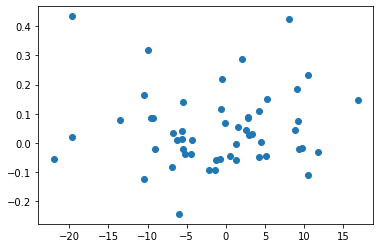

In [254]:
fig, ax = plt.subplots()
ax.scatter(df3['SOI'], df3['c_t1'])

In [255]:
df3.corr()

,Transect 25,Transect 24,Transect 23,Transect 22,Transect 21,Transect 20,Transect 19,Transect 18,Transect 17,Transect 16,...,Transect 5,Transect 4,Transect 3,Transect 2,Transect 1_WEC,c_t1,c_t2,c_t3,SAMI,SOI
Transect 25,1.000000,0.836728,0.649725,0.436148,0.446415,0.430594,0.356385,0.361904,0.360534,0.255469,...,0.059302,0.059448,0.017638,0.038132,-0.041792,-0.284125,0.663866,0.194073,-0.083964,-0.284269
Transect 24,0.836728,1.000000,0.787033,0.570705,0.488866,0.482097,0.416650,0.332903,0.343795,0.228364,...,0.138600,0.171314,0.030943,0.070163,-0.050359,-0.319814,0.671862,0.240665,-0.175288,-0.246461
Transect 23,0.649725,0.787033,1.000000,0.698616,0.642433,0.572412,0.501259,0.426705,0.397461,0.387543,...,0.338297,0.409631,0.257976,0.290974,0.178673,-0.536243,0.472680,0.178639,-0.323338,-0.087044
Transect 22,0.436148,0.570705,0.698616,1.000000,0.758374,0.631133,0.591858,0.406328,0.432168,0.520795,...,0.253567,0.331542,0.359696,0.332518,0.230321,-0.547309,0.394863,0.145607,-0.004575,-0.045345
Transect 21,0.446415,0.488866,0.642433,0.758374,1.000000,0.888242,0.843347,0.693936,0.676779,0.695953,...,0.416352,0.406869,0.359124,0.333281,0.263559,-0.673100,0.384286,-0.216500,-0.073101,0.017945
Transect 20,0.430594,0.482097,0.572412,0.631133,0.888242,1.000000,0.893188,0.797913,0.787813,0.771020,...,0.491013,0.510854,0.466172,0.436506,0.377345,-0.734160,0.277953,-0.151230,-0.031037,-0.081632
Transect 19,0.356385,0.416650,0.501259,0.591858,0.843347,0.893188,1.000000,0.881574,0.828733,0.769363,...,0.556021,0.537621,0.485286,0.478179,0.415363,-0.764289,0.195873,-0.263382,-0.048902,-0.043633
Transect 18,0.361904,0.332903,0.426705,0.406328,0.693936,0.797913,0.881574,1.000000,0.928841,0.790165,...,0.595310,0.548241,0.468156,0.471082,0.437867,-0.744208,0.126364,-0.322446,-0.014250,-0.046387
Transect 17,0.360534,0.343795,0.397461,0.432168,0.676779,0.787813,0.828733,0.928841,1.000000,0.886714,...,0.571757,0.534611,0.486841,0.469035,0.423647,-0.739159,0.129863,-0.306980,0.039944,-0.079484
Transect 16,0.255469,0.228364,0.387543,0.520795,0.695953,0.771020,0.769363,0.790165,0.886714,1.000000,...,0.590756,0.585670,0.621998,0.578958,0.519098,-0.781127,0.003026,-0.192156,0.082925,-0.051060


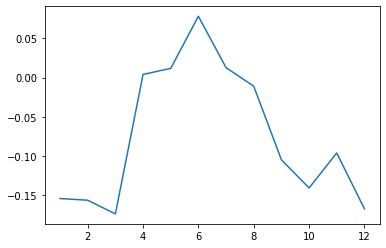

In [305]:
# Monthly averages of "rotation" variability

plt.plot(df2.groupby(df2.index.month)['c_t2'].mean())

In [302]:
# Ranges of shoreline positions from the first EOF related to each transect location
# e.g. shoreline variability resulting from the first EOF has a range of 19 m at the western profile 
ranges = []
means = []
for j in range(k):
    temp = [np.ptp((e_x[:,j] * w[j])[i] * c_t1) for i in range(y.shape[1])]
    temp2 = [np.mean((e_x[:,j] * w[j])[i] * c_t1) for i in range(y.shape[1])]
    ranges.append(temp)
    means.append(temp2)

In [304]:
pOfVar[0] + pOfVar[1]

79.15632677392406

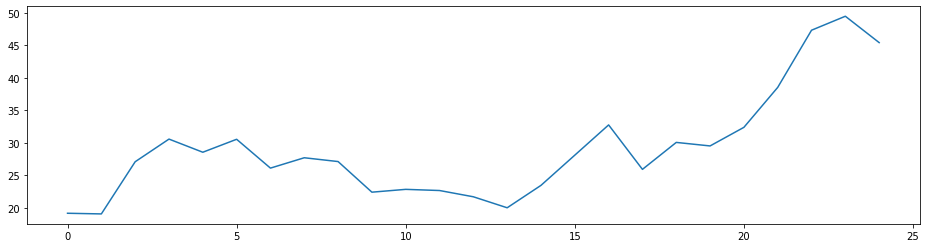

In [289]:
fig,ax = plt.subplots(figsize = (16, 4))
ax.plot(ranges)